In [2]:
import warnings

warnings.filterwarnings('ignore')
import stereo as st

data_path = '/data/user/mowp/data/stereo-seq/Demo_MouseBrain/SS200000135TL_D1.tissue.gef'

# read the GEF file information
st.io.read_gef_info(data_path)

# read the GEF file
data = st.io.read_gef(file_path=data_path, bin_size=50)

# Preprocessing
data.tl.cal_qc()

#Filtering
data.tl.filter_cells(min_gene=200, min_n_genes_by_counts=3, max_n_genes_by_counts=2500, pct_counts_mt=5, inplace=True)

#Normalization
data.tl.raw_checkpoint()
data.tl.raw
#data.tl.sctransform(res_key='sctransform', n_genes=2000, filter_hvgs=False, inplace=True)
data.tl.normalize_total(target_sum=10000)
data.tl.log1p()

#Highly variable genes
data.tl.highly_variable_genes(min_mean=0.0125, max_mean=3,min_disp=0.5, n_top_genes=2000, res_key='highly_variable_genes')
data.tl.scale()

[2023-10-20 17:32:30][Stereo][3332175][MainThread][140494593447744][reader][1153][INFO]: This is GEF file which contains traditional bin infomation.
[2023-10-20 17:32:30][Stereo][3332175][MainThread][140494593447744][reader][1154][INFO]: bin_type: bins
[2023-10-20 17:32:30][Stereo][3332175][MainThread][140494593447744][reader][1157][INFO]: Bin size list: ['bin1']
[2023-10-20 17:32:30][Stereo][3332175][MainThread][140494593447744][reader][1163][INFO]: Resolution: 500
[2023-10-20 17:32:30][Stereo][3332175][MainThread][140494593447744][reader][1166][INFO]: Gene count: 24302
[2023-10-20 17:32:30][Stereo][3332175][MainThread][140494593447744][reader][1175][INFO]: offsetX: 0
[2023-10-20 17:32:30][Stereo][3332175][MainThread][140494593447744][reader][1178][INFO]: offsetY: 0
[2023-10-20 17:32:30][Stereo][3332175][MainThread][140494593447744][reader][1181][INFO]: Width: 26458
[2023-10-20 17:32:30][Stereo][3332175][MainThread][140494593447744][reader][1184][INFO]: Height: 26458
[2023-10-20 17:32

path:/data/user/mowp/data/stereo-seq/Demo_MouseBrain/SS200000135TL_D1.tissue.gef bin:50
               generateBinInfo - 22.698573 cpu sec


[2023-10-20 17:32:43][Stereo][3332175][MainThread][140494593447744][reader][1117][INFO]: the matrix has 35998 cells, and 24302 genes.
[2023-10-20 17:32:44][Stereo][3332175][MainThread][140494593447744][reader][1125][INFO]: read_gef end.
[2023-10-20 17:32:44][Stereo][3332175][MainThread][140494593447744][st_pipeline][37][INFO]: start to run cal_qc...
[2023-10-20 17:32:44][Stereo][3332175][MainThread][140494593447744][st_pipeline][40][INFO]: cal_qc end, consume time 0.5009s.
[2023-10-20 17:32:44][Stereo][3332175][MainThread][140494593447744][st_pipeline][37][INFO]: start to run filter_cells...
[2023-10-20 17:32:45][Stereo][3332175][MainThread][140494593447744][st_pipeline][40][INFO]: filter_cells end, consume time 0.5377s.
[2023-10-20 17:32:45][Stereo][3332175][MainThread][140494593447744][st_pipeline][37][INFO]: start to run normalize_total...
[2023-10-20 17:32:45][Stereo][3332175][MainThread][140494593447744][st_pipeline][40][INFO]: normalize_total end, consume time 0.2992s.
[2023-10-2

In [3]:
#  analysis of spatial hotspot
data.tl.spatial_hotspot(
                    use_highly_genes=True,
                    use_raw=True,
                    hvg_res_key='highly_variable_genes',
                    model='normal',
                    n_neighbors=30,
                    n_jobs=20,
                    fdr_threshold=0.05,
                    min_gene_threshold=10,
                    res_key='spatial_hotspot',
                    )

[2023-10-20 17:32:57][Stereo][3332175][MainThread][140494593447744][st_pipeline][37][INFO]: start to run spatial_hotspot...
[2023-10-20 17:33:03][Stereo][3332175][MainThread][140494593447744][spatial_hotspot][48][INFO]: create the Hotspot object with 2000 genes and 35393 cells, model=normal.
[2023-10-20 17:33:05][Stereo][3332175][MainThread][140494593447744][spatial_hotspot][50][INFO]: create_knn_graph with n_neighbors=30.
[2023-10-20 17:33:25][Stereo][3332175][MainThread][140494593447744][spatial_hotspot][54][INFO]: Start compute_autocorrelations.
100%|██████████| 2000/2000 [00:44<00:00, 45.00it/s]
[2023-10-20 17:34:11][Stereo][3332175][MainThread][140494593447744][spatial_hotspot][58][INFO]: Remain 936 genes whose FDR < 0.05.
[2023-10-20 17:34:11][Stereo][3332175][MainThread][140494593447744][spatial_hotspot][60][INFO]: Start compute_local_correlations.


Computing pair-wise local correlation on 936 features...


100%|██████████| 437580/437580 [01:26<00:00, 5071.33it/s]
[2023-10-20 17:35:48][Stereo][3332175][MainThread][140494593447744][spatial_hotspot][62][INFO]: Start create_modules with min_gene_threshold=10, fdr_threshold=0.05.
[2023-10-20 17:35:48][Stereo][3332175][MainThread][140494593447744][spatial_hotspot][66][INFO]: Start calculate_module_scores in per cell.


Computing scores for 19 modules...


100%|██████████| 19/19 [00:08<00:00,  2.34it/s]
[2023-10-20 17:35:56][Stereo][3332175][MainThread][140494593447744][st_pipeline][40][INFO]: spatial_hotspot end, consume time 178.9119s.


In [4]:
data

StereoExpData object with n_cells X n_genes = 35393 X 24302
bin_type: bins
bin_size: 50
offset_x = 0
offset_y = 0
cells: ['cell_name', 'total_counts', 'n_genes_by_counts', 'pct_counts_mt']
genes: ['gene_name', 'n_cells', 'n_counts', 'mean_umi', 'hvgs']
key_record: {'hvg': ['highly_variable_genes']}
result: ['highly_variable_genes', 'spatial_hotspot']

In [ ]:
data.tl.result['spatial_hotspot']

In [ ]:
type(data.tl.result['spatial_hotspot'])

hotspot.hotspot.Hotspot

In [ ]:
# TO-READ
# https://yoseflab.github.io/Hotspot/

Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

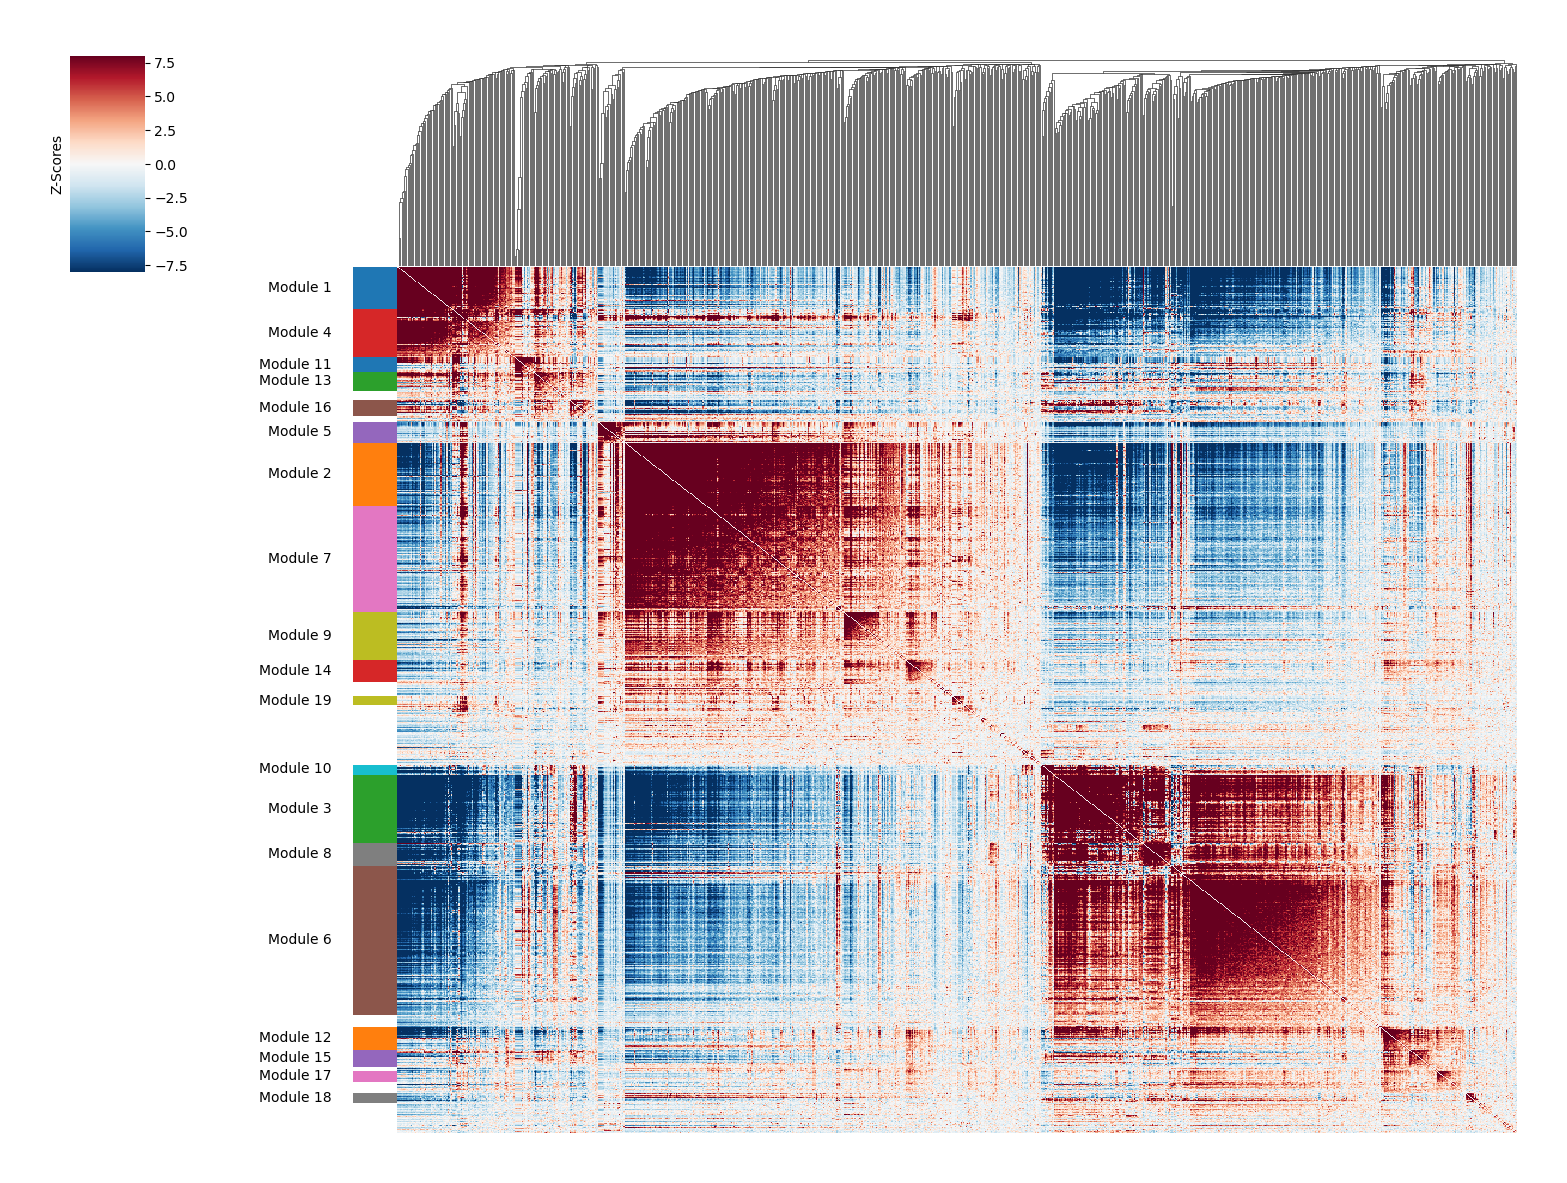

In [7]:
data.plt.hotspot_local_correlations(res_key='spatial_hotspot')

Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

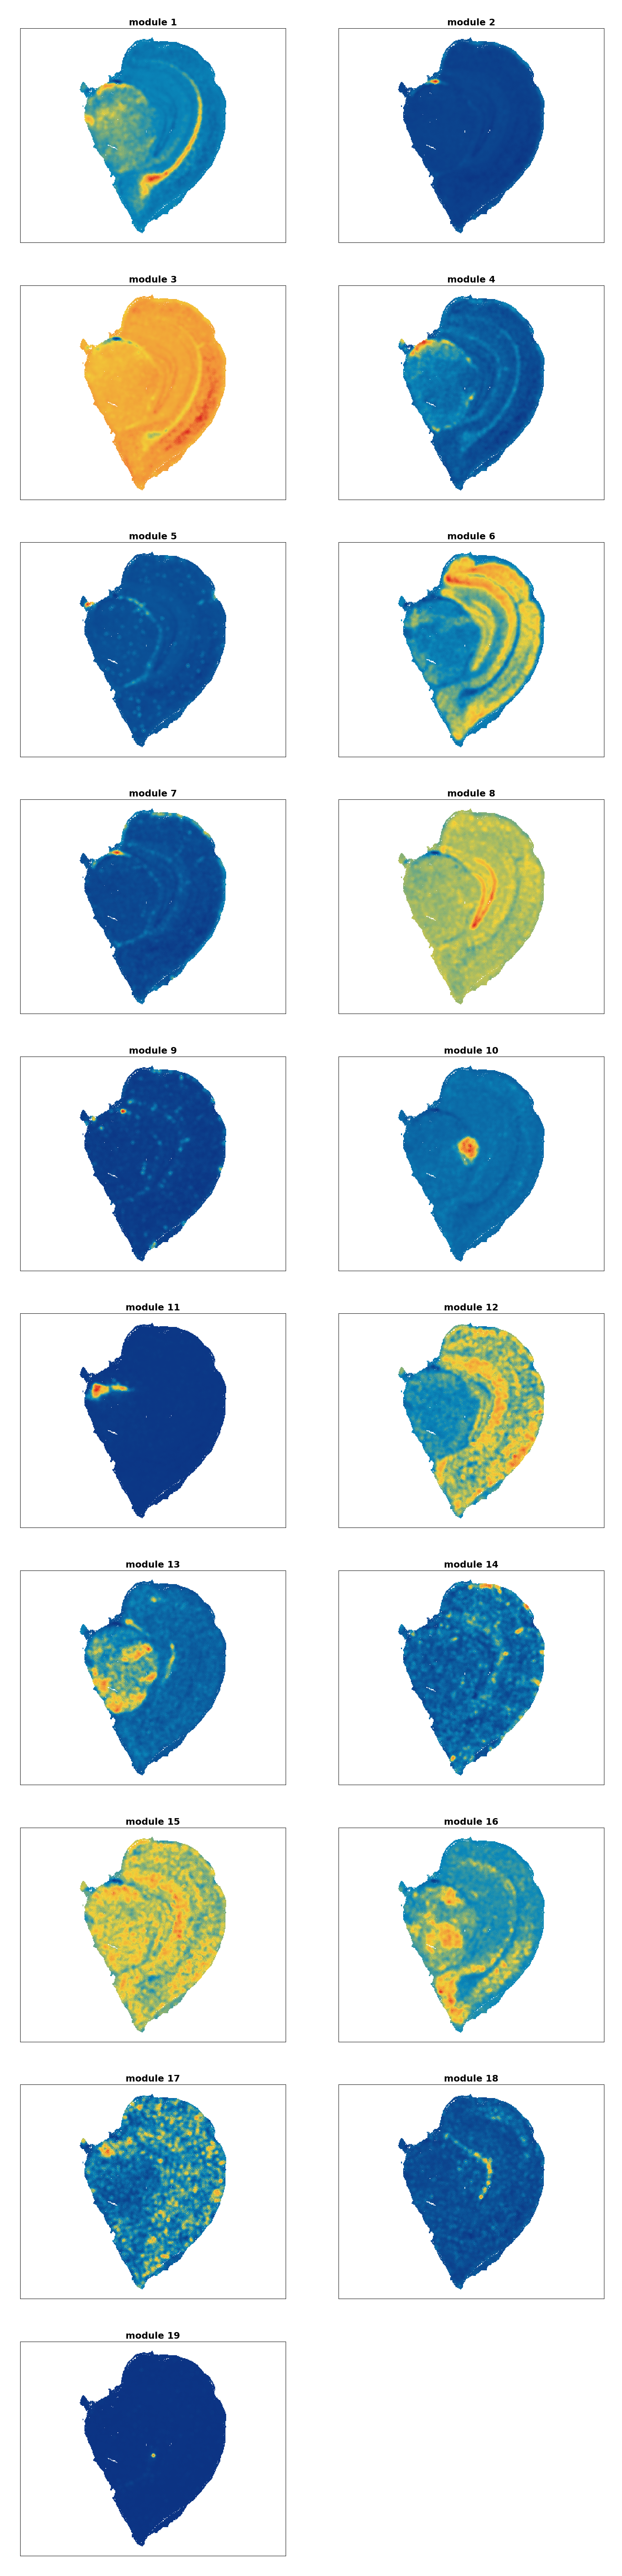

In [8]:
data.plt.hotspot_modules(res_key='spatial_hotspot')